Dataset shape: (90189, 5)
   user_id  gate  gamerounds_sum  retention_day  retention_week
0      116    30               3          False           False
1      337    30              38           True           False
2      377    50             165           True           False
3      483    50               1          False           False
4      488    50             179           True            True
Missing values in key columns:
 gate              0
retention_day     0
retention_week    0
dtype: int64
One-Day Retention: z = 1.784, p = 0.074
One-Week Retention: z = 3.164, p = 0.002

Day-1 Retention Summary:
      successes      n      prop  ci_lower  ci_upper
gate                                                
30        20034  44700  0.448188  0.443582  0.452802
50        20119  45489  0.442283  0.437724  0.446851

Week-1 Retention Summary:
      successes      n      prop  ci_lower  ci_upper
gate                                                
30         8502  44700  0.190201 

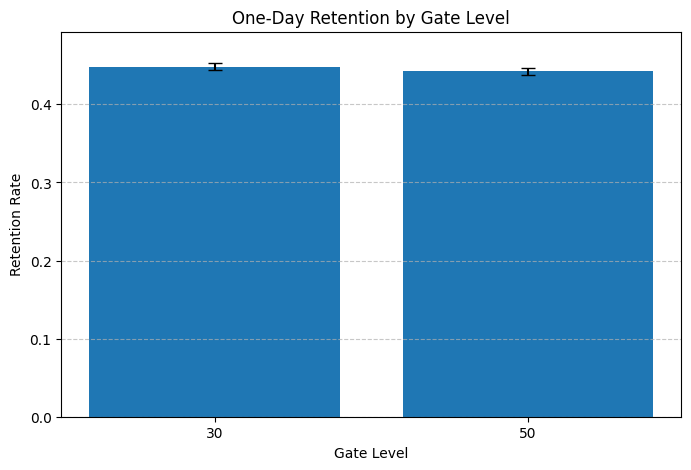

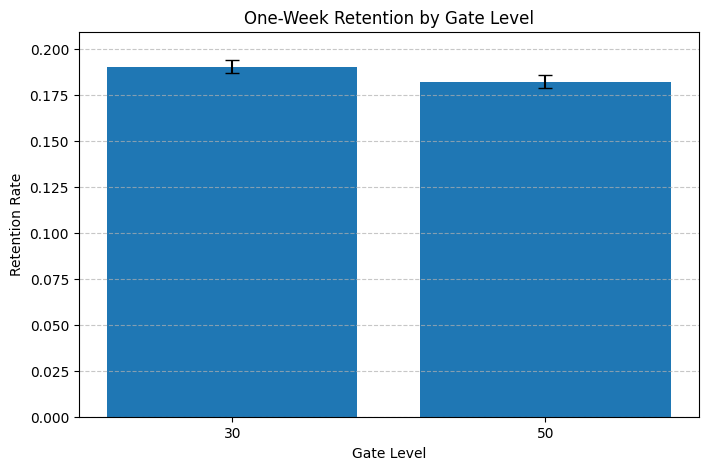

In [7]:
# Google Colab Script  Candy Crush A/B Test Analysis

# 2. Imports
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.proportion as smp
import matplotlib.pyplot as plt

# 3. Load the data


# Upload 'candy_crush.csv'
df = pd.read_csv('/content/candy_crush.csv')

# 4. Preliminary data inspection
print('Dataset shape:', df.shape)
print(df.head())
print('Missing values in key columns:\n', df[['gate','retention_day','retention_week']].isnull().sum())

# 5. Summarise successes and counts by gate
stats_day  = df.groupby('gate')['retention_day'].agg(successes='sum', n='count')
stats_week = df.groupby('gate')['retention_week'].agg(successes='sum', n='count')

# 6. Compute retention proportions
stats_day['prop']  = stats_day['successes'] / stats_day['n']
stats_week['prop'] = stats_week['successes'] / stats_week['n']

# 7. Two sample z tests for proportions
y = stats_day['successes']
n = stats_day['n']
z_day, p_day = proportions_ztest(y, n)

y_w = stats_week['successes']
n_w = stats_week['n']
z_week, p_week = proportions_ztest(y_w, n_w)

print(f"One-Day Retention: z = {z_day:.3f}, p = {p_day:.3f}")
print(f"One-Week Retention: z = {z_week:.3f}, p = {p_week:.3f}")

# 8. Compute 95% Wilson confidence intervals
ci_day30  = smp.proportion_confint(stats_day.loc[30,'successes'],  stats_day.loc[30,'n'],  method='wilson')
ci_day50  = smp.proportion_confint(stats_day.loc[50,'successes'],  stats_day.loc[50,'n'],  method='wilson')
ci_week30 = smp.proportion_confint(stats_week.loc[30,'successes'], stats_week.loc[30,'n'], method='wilson')
ci_week50 = smp.proportion_confint(stats_week.loc[50,'successes'], stats_week.loc[50,'n'], method='wilson')

# Assign CI's back to DataFrames
stats_day.loc[30, 'ci_lower'], stats_day.loc[30,'ci_upper'] = ci_day30
stats_day.loc[50, 'ci_lower'], stats_day.loc[50,'ci_upper'] = ci_day50

stats_week.loc[30, 'ci_lower'], stats_week.loc[30,'ci_upper'] = ci_week30
stats_week.loc[50, 'ci_lower'], stats_week.loc[50,'ci_upper'] = ci_week50

# 9. Display summary tables
print('\nDay-1 Retention Summary:')
print(stats_day)
print('\nWeek-1 Retention Summary:')
print(stats_week)

# 10. Plotting
plt.figure(figsize=(8,5))
plt.bar(stats_day.index.astype(str), stats_day['prop'],
        yerr=[stats_day['prop']-stats_day['ci_lower'], stats_day['ci_upper']-stats_day['prop']], capsize=5)
plt.title('One-Day Retention by Gate Level')
plt.xlabel('Gate Level')
plt.ylabel('Retention Rate')
plt.ylim(0, stats_day['prop'].max()*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8,5))
plt.bar(stats_week.index.astype(str), stats_week['prop'],
        yerr=[stats_week['prop']-stats_week['ci_lower'], stats_week['ci_upper']-stats_week['prop']], capsize=5)
plt.title('One-Week Retention by Gate Level')
plt.xlabel('Gate Level')
plt.ylabel('Retention Rate')
plt.ylim(0, stats_week['prop'].max()*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

